In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import hann
from scipy        import fftpack as fft
from scipy.signal import hann
from scipy.signal import chebwin
from scipy.signal import blackman
from scipy        import signal
from scipy.signal import butter
from scipy.signal import filtfilt

In [9]:
#PSD
def PSD (signal, l=1024, T=0.5, sr=1000):

    N=signal.shape[0]
    psd=[]

    i = 0;
    cont = 0;
    while cont <= N:
        ps=fft.fft(signal[i:i+l])
        psd.append(20*np.log(np.abs(ps)))
        i = i+int((1-T)*l)
        cont = i+l
    
    psd=np.array(psd[:-1])    
    psd = np.mean(psd,0)

    n = np.size(psd,0)//2

    plt.plot(np.linspace(0,sr/2,n), psd[0:n])
    plt.grid(True)
    return [psd[0:n]]

In [10]:
def ten_lin (s, t, N=1024):
    y_fin = []
    for i in range(len(s)//N):
        x = []
        x.append(t[i*N:i*N+N])
        x.append(np.ones(len(t[i*N:i*N+N])))
        x = np.array(x).T
        
        y = []
        y.append(s[i*N:i*N+N])
        y = np.array(y).T
        
        w = np.dot(x.T,x)
        w = np.linalg.inv(w)
        w = np.dot(w, x.T)
        w = np.dot(w,y)
        
        yy = w[0]*t[i*N:i*N+N] + w[1]
        yy = s[i*N:i*N+N]-yy
        
        y_fin.append(yy)
        
    return (np.array(y_fin).flatten())

In [11]:
path = '/Users/Arroy javier/Desktop/MCIB/MCIB-19-P/data/Señales adquirid/'
fname = 'Medi7.txt'

In [12]:
data = np.loadtxt(path+fname,delimiter='\t',dtype='str')

t=data[ : , 0]
SO2=data[:,1]
RESP=data[:,2]
EMG=data[:,3]
PUL=data[:,4]
ECG=data[:,5]

t    = t.astype('float')*60
SO2  = SO2.astype('float')
RESP = RESP.astype('float')
EMG  = EMG.astype('float')
PUL  = PUL.astype('float')
ECG  = ECG.astype('float')


In [18]:
def filt_but(s, w, ord = 5):
    w = w/500
    [b,a] =butter(ord, w, 'low')
    x = filtfilt(b, a, s)
    return (x,b,a)

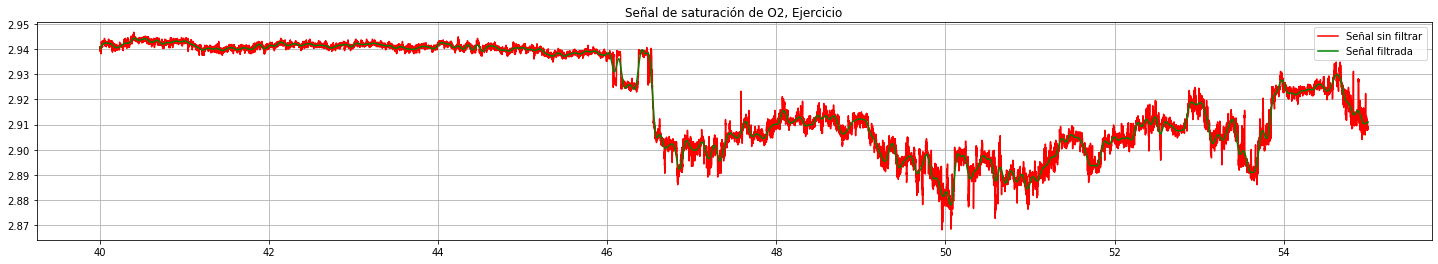

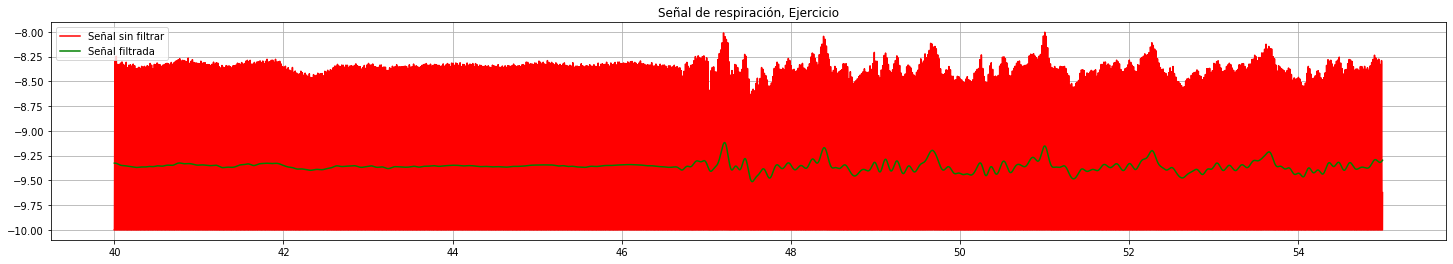

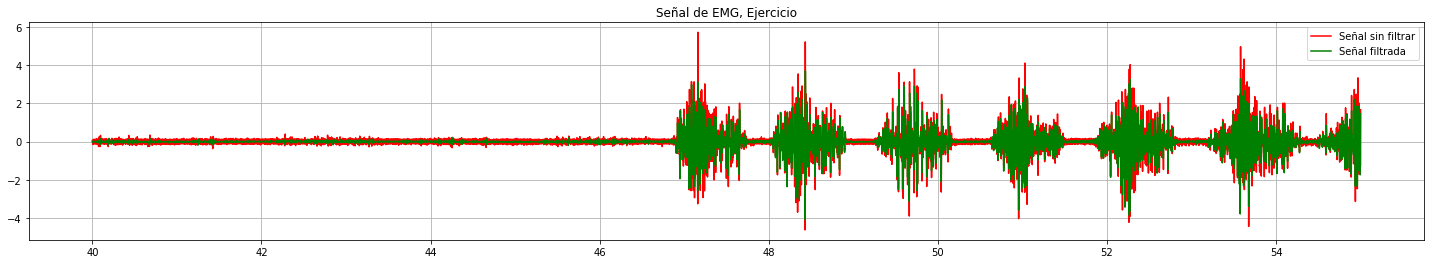

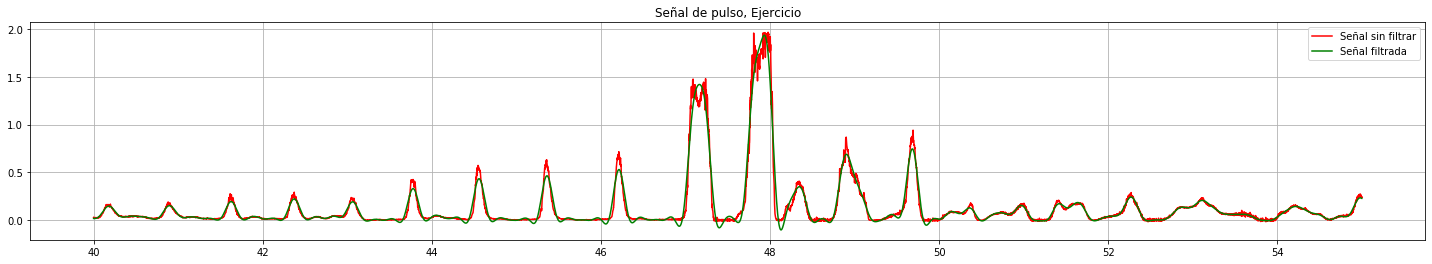

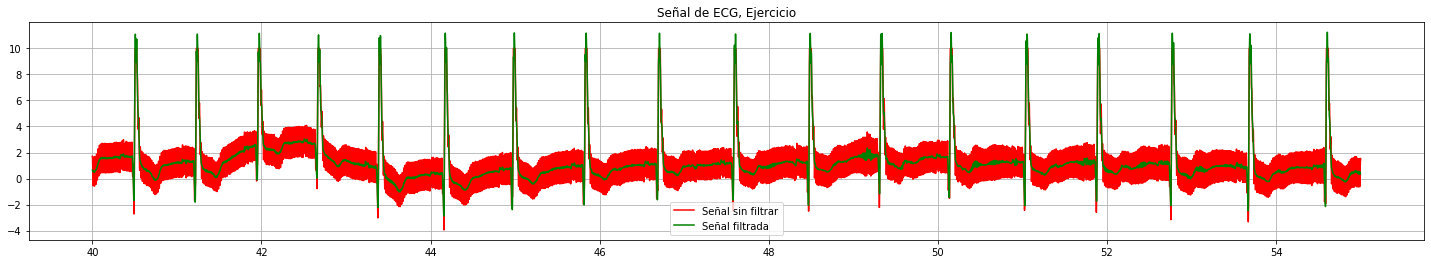

In [21]:
# Filtro notch para quitar el ruido de 60 Hz en algunas señales
[b_n, a_n] = signal.iirnotch(60.0, 70.0, 1000)

#SO2
[SO2_f, b, a]= filt_but(SO2, 10)
plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], SO2[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], SO2_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de saturación de O2, Ejercicio") 
plt.grid(True)

#RESP
[RESP_f, b, a]= filt_but(RESP, 10)
plt.figure(figsize = (25, 4))
plt.plot(t[40000:55000], RESP[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], RESP_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de respiración, Ejercicio") 
plt.grid(True)


#EMG
EMG_n= filtfilt(b_n, a_n, EMG)
[EMG_f, b, a]= filt_but(EMG_n, 150)
plt.figure(figsize = (25, 4))

plt.plot(t[40000:55000], EMG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], EMG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de EMG, Ejercicio") 
plt.grid(True)


#PUL
[PUL_f, b, a]= filt_but(PUL, 5)
plt.figure(figsize = (25, 4))

plt.plot(t[40000:55000], PUL[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], PUL_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de pulso, Ejercicio") 
plt.grid(True)


#ECG
ECG_n= filtfilt(b_n, a_n, ECG)
[ECG_f, b, a]= filt_but(ECG_n, 100)
plt.figure(figsize = (25, 4))

plt.plot(t[40000:55000], ECG[40000:55000],color = 'red', label="Señal sin filtrar")
plt.plot(t[40000:55000], ECG_f[40000:55000],color = 'green', label="Señal filtrada")
plt.legend(loc='best')
plt.title("Señal de ECG, Ejercicio") 
plt.grid(True)



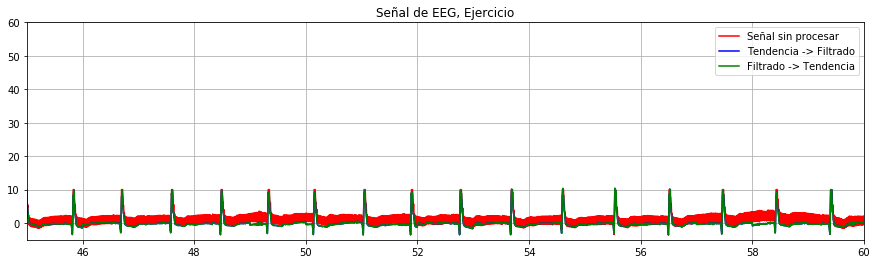

In [33]:
from scipy import signal

ECG_ten = ten_lin (ECG, t,1000)
ECG_ten_n= filtfilt(b_n, a_n, ECG_ten)
[ECG_ten_fil, b, a]= filt_but(ECG_ten_n, 100)

# Filtrado ---- Tendencia
ECG_f_n= filtfilt(b_n, a_n, ECG)
[ECG_fil, b1, a1]= filt_but(ECG_f_n, 100)
ECG_fil_ten = ten_lin (ECG_fil, t,1000)

plt.figure(figsize = (15, 4))
plt.plot(t, ECG,color = 'red', label="Señal sin procesar")
plt.plot(t[0:112000], ECG_ten_fil[0:112000], color = 'blue', label="Tendencia -> Filtrado")
plt.plot(t[0:112000], ECG_fil_ten[0:112000],color = 'green', label="Filtrado -> Tendencia")
plt.legend(loc='best')
plt.title("Señal de EEG, Ejercicio") 
plt.ylim(-5,60)
plt.xlim(45,60)
plt.grid(True)


In [34]:
print(ECG.shape[0])
print(ECG_ten_fil.shape)

112129
(112000,)
